In [208]:
import numpy as np

np.random.rand()

# w takim wypadku seed jest ustalany przez pythona samodzielnie

0.34079598201082795

In [209]:
np.random.seed(123)

print(np.random.rand())
print(np.random.rand())
print(np.random.rand())
print(np.random.rand())
print(np.random.rand())

# jak ustalimy seed samodzielnie to wyniki będą zawsze takie same!


0.6964691855978616
0.28613933495037946
0.2268514535642031
0.5513147690828912
0.7194689697855631


In [210]:
#liczba pseudolosowa pomiędzy intami

np.random.randint(0,2) # 2 już się nie łapie, więc 'losowanie' odbywa się między 0 a 1


1

In [211]:
lista = []

for i in range(100):
    r = np.random.randint(0,2)
    lista = lista + [r]

print(lista)

# lista = np.array(lista)
# jedynki = np.count_nonzero(lista)
# jedynki

print(lista.count(0))
print(lista.count(1))


[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
53
47


In [1]:
# 1,2 = -1
# 3,4,5 = +1
# 6 = kolejny ruch i + o tyle oczek ile wypadnie
# max 100 rzutów
# 60 stopni

import numpy as np
import pandas as pd

wyniki = pd.DataFrame({'Seria':[],'Tura':[],'Rzut':[],'Stopnie':[],'Specjalny?':[]})

seria = 0

for serie in range(100):

    seria = seria + 1
    stopnie = 0
    tury = 0

    
    
    while tury < 100 and stopnie < 60:
        
        tury = tury + 1
        rzut = np.random.randint(1,7)
    
        if rzut in (1,2) and stopnie > 0:
            #odejmujemy 1 stopień i zapisujemy wynik
            stopnie = stopnie - 1
            wynik = pd.DataFrame([{'Seria': seria, 'Tura': tury,'Rzut': rzut,'Stopnie': stopnie,'Specjalny?': '' }])
            wyniki = pd.concat([wyniki,wynik])
        
        if rzut in (3,4,5):
            #dodajemy 1 stopień i zapisujemy wynik
            stopnie = stopnie + 1
            wynik = pd.DataFrame([{'Seria': seria, 'Tura': tury,'Rzut': rzut,'Stopnie': stopnie,'Specjalny?': '' }])
            wyniki = pd.concat([wyniki,wynik])
            
        if rzut == 6:
            # zapisujemy 6
            wynik = pd.DataFrame([{'Seria': seria, 'Tura': tury,'Rzut': rzut,'Stopnie': stopnie,'Specjalny?': '' }])
            wyniki = pd.concat([wyniki,wynik])

            if tury < 100:
            # dodajemy turę i wykonujemy dodatkowy rzut po czym go zapisujemy
                tury = tury + 1
                rzut = np.random.randint(1,7)
                stopnie = stopnie + rzut
                wynik = pd.DataFrame([{'Seria': seria, 'Tura': tury,'Rzut': rzut,'Stopnie': stopnie,'Specjalny?': 'Tak' }])
                wyniki = pd.concat([wyniki,wynik])

    

wyniki = wyniki.reset_index(drop = True)
wyniki

,Seria,Tura,Rzut,Stopnie,Specjalny?
0,1.0,1.0,5.0,1.0,
1,1.0,2.0,4.0,2.0,
2,1.0,3.0,4.0,3.0,
3,1.0,4.0,4.0,4.0,
4,1.0,5.0,2.0,3.0,
...,...,...,...,...,...
8751,100.0,96.0,3.0,55.0,
8752,100.0,97.0,5.0,56.0,
8753,100.0,98.0,4.0,57.0,
8754,100.0,99.0,4.0,58.0,


    Seria   Tura  Rzut  Stopnie Specjalny? Zwyciestwo_lub_porazka
0     1.0   92.0   6.0     65.0        Tak             Zwyciestwo
1     2.0  100.0   5.0     59.0                           Porazka
2     3.0   95.0   4.0     60.0                        Zwyciestwo
3     4.0  100.0   1.0     51.0                           Porazka
4     5.0   74.0   6.0     63.0        Tak             Zwyciestwo
..    ...    ...   ...      ...        ...                    ...
95   96.0   97.0   5.0     60.0                        Zwyciestwo
96   97.0  100.0   1.0     46.0                           Porazka
97   98.0   66.0   4.0     62.0        Tak             Zwyciestwo
98   99.0   96.0   6.0     62.0        Tak             Zwyciestwo
99  100.0  100.0   1.0     57.0                           Porazka

[100 rows x 6 columns]


Text(0.5, 0, 'Seria')

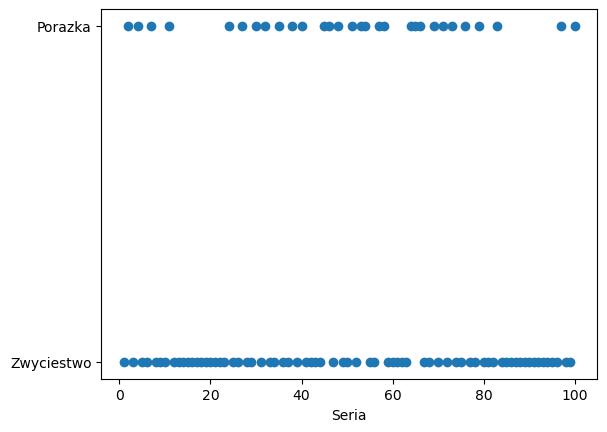

In [2]:
# zwyciestwa = wyniki[wyniki['Stopnie'] >= 60]['Seria'].count()
# print(zwyciestwa)

# porazki = wyniki[np.logical_and(wyniki['Stopnie'] < 60, wyniki['Tura'] == 100)]['Seria'].count()
# print(porazki)


podsumowanie = wyniki[np.logical_or(wyniki['Stopnie'] >= 60, wyniki['Tura'] == 100)]

podsumowanie = podsumowanie.reset_index(drop = True)
podsumowanie['Zwyciestwo_lub_porazka'] =  np.where(podsumowanie['Stopnie'] >= 60, 'Zwyciestwo', 'Porazka')

print(podsumowanie)

import matplotlib.pyplot as plt

plt.scatter(podsumowanie['Seria'],podsumowanie['Zwyciestwo_lub_porazka'])
plt.xlabel('Seria')
# plt.show()

